In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [2]:
class Model(nn.Module):
    
    
    def __init__(self,in_features=4, h1=8,h2=9,out_features=3):
        super().__init__()
        #how many layers?
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        #input layer(4features) -> h1 N -> h2 N-> output(3classes)
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df = df.rename(columns ={'variety' : 'target'})

In [8]:
dic = {'Setosa' : 0 ,'Versicolor':1,'Virginica':2}

In [9]:
df['target'] = df['target'].map(dic)
df

,sepal.length,sepal.width,petal.length,petal.width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
X = df.drop('target',axis=1)
y = df['target']

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X=X.values
y=y.values

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
epochs = 100
losses = []

for i in range(epochs):
    #forward and get a predictions
    model.train()
    y_pred = model(X_train)
    
    
    #calculate loss/error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i % 10 ==0:
        print(f'epoch {i}, loss is {loss}')
              
    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0, loss is 1.150745153427124
epoch 10, loss is 0.937144935131073
epoch 20, loss is 0.7796427011489868
epoch 30, loss is 0.6080240607261658
epoch 40, loss is 0.39879193902015686
epoch 50, loss is 0.25233572721481323
epoch 60, loss is 0.14915479719638824
epoch 70, loss is 0.10022767633199692
epoch 80, loss is 0.08097168058156967
epoch 90, loss is 0.07214364409446716


Text(0.5, 0, 'Epoch')

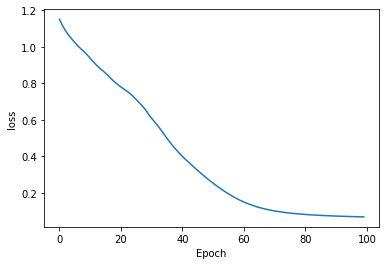

In [20]:
plt.plot(range(epochs),  losses)
plt.ylabel('loss')
plt.xlabel('Epoch')

In [21]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [37]:
X_test

tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [4.8000, 3.0000, 1.4000, 0

In [29]:
correct = 0

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        
        
        print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f'We got {correct} correct!')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 30 correct!


In [39]:
y_val

tensor([-6.7154,  3.1181,  4.9589])

In [30]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [31]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [32]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [35]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [36]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())


tensor([  5.9822,   1.5737, -10.0733])
tensor(0)
